# Pandas

## Importing Data

### CSV FIles

```python
pd.read_csv(filename , index_col='col_name')


DF  ---> CSV :::

df.to_csv("file_name.csv")

```

### Dictionaries

#### List of Dictionaries

In [313]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


####  Dictionary of Lists

In [ ]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)
avocados_2019

## Inspection



```python

- .head()                    # Head  
- .info()                    # Data type and # of missing values   
- .shape                     # Shape   
- .describe()                # Summary statistics   
- .dtypes                    # Data  Types   
```
<br>

```python
- .values               # A two-dimensional NumPy array of values 
- .columns              # column names  
- .index                # row numbers/row names  
  

#Assign New Column Names##
df.columns = ['new', 'new']


##  DELETING COLUMNS ###

del df['col']
```


## Transformation Methods

### Pandas Vectorized Methods

```python
df.add(1)                           #Add 1 to all elements
df.sub([1, 2], axis='columns')      #Subtract 1 from 1st column, 2 from second column
df.floordiv()                       #Integer Division
df.floordiv(12)                     #Convert to Dozen's of Units


### APPLY METHOD ####

df.apply(FUNCTION)        #Function has to return a calculated value, This function is applied to all df elements

df.apply(lambda n: n//12)          # (lambda INPUT : OUTPUT-RETURNED)

### STRING OPERATIONS ###
df.index.str.upper()


###APPLY METHOD FOR INDEX#####

#!!!!.aaply() methods dosen't work!!! ------> use .map() method
df.index.map(FUNCTION)


####.map() Method####

#The .map() method is used to transform values according to a Python dictionary look-up
lookup_dictionary = {'col_value_1' : 'new_value_1'  ,  'col_value_2' : 'new_value_2'}
df['new_column'] = df.col.map(lookup_dictionary)
```

$$\text{Vectorized functions (called Universal Functions or UFuncs in NumPy) }$$

```python
from scipy.stats import zscore
#zscore ---> Vectorized Function

z_score =  zscore(df['col'])
```

$$\text{Apply Method}$$


```python
def dozens(n):
    return n//12

df.apply(dozens)

```

## Slicing and indexing

### Setting a Column as the Index / Sorting

```python
df.set_index('col')          # Set 'col' as Index
df.reset_index()            #Reset Index ( Convert index to column)
df.reset_index(drop=True)  #Remove the Index column entirely

### Multi-Level / Hierarchial Indexing ####
df.set_index(['col1','col2'])                     # col2 is nested inside col1


## SETTING INDEX NAME####

df.index.name= 'xyz'

#### SLICING  ####
df.loc[['col1','col2']]                            #Nested Indexing (col1 = SuperSet, col2=Subset)

###Subsetting Inner Levels###

df.loc   [[     ('A','B')     ,          ('C','D')   ]]
           # (Outer Level, Inner)      (Outer, Inner)
```



<center><b style="font-size:30px;color:green">Sort By Index Values </b></center>

```python
df.sort_index()
df.sort_index(level=['index2'])
df.sort_index(level=['index1','index2'],   ascending=[True, False])

```

### .loc (Filter on Index Values)

```python
df.loc[['A','B']]  #Filter on Index ('A & B  = Values to be filtered')



##slice method##
df.loc [( slice(None), slice('2001', '2002') ) , : ] 

```

In [223]:
### DATA ###
df = pd.read_csv('datasets/temperature.csv').drop(columns=['AverageTemperatureUncertainty','Latitude','Longitude'])
df['date'] = df['dt']
df = df.drop(columns=['dt'])
df.head()

,AverageTemperature,City,Country,date
0,26.704,Abidjan,Côte D'Ivoire,1849-01-01
1,27.434,Abidjan,Côte D'Ivoire,1849-02-01
2,28.101,Abidjan,Côte D'Ivoire,1849-03-01
3,26.140,Abidjan,Côte D'Ivoire,1849-04-01
4,25.427,Abidjan,Côte D'Ivoire,1849-05-01


In [224]:
df = df.set_index(['Country','City'])
df.head(10)

AverageTemperature        date
Country       City                                   
Côte D'Ivoire Abidjan              26.704  1849-01-01
              Abidjan              27.434  1849-02-01
              Abidjan              28.101  1849-03-01
              Abidjan              26.140  1849-04-01
              Abidjan              25.427  1849-05-01
              Abidjan              24.844  1849-06-01
              Abidjan              24.058  1849-07-01
              Abidjan              23.576  1849-08-01
              Abidjan              23.662  1849-09-01
              Abidjan              25.263  1849-10-01

In [219]:
cities = ['Moscow' ,'Saint Petersburg']

In [222]:
df.loc[cities]

,AverageTemperature,Country,date
City,,,
Moscow,-2.570,Russia,1743-11-01
Moscow,NaN,Russia,1743-12-01
Moscow,NaN,Russia,1744-01-01
Moscow,NaN,Russia,1744-02-01
Moscow,NaN,Russia,1744-03-01
...,...,...,...
Saint Petersburg,12.355,Russia,2013-05-01
Saint Petersburg,17.185,Russia,2013-06-01
Saint Petersburg,17.234,Russia,2013-07-01


In [227]:
rows_to_keep = [('Brazil', 'Rio De Janeiro'),( 'Pakistan', 'Lahore')]

In [228]:
df.loc[rows_to_keep]

AverageTemperature        date
Country  City                                          
Brazil   Rio De Janeiro              25.320  1832-01-01
         Rio De Janeiro              26.584  1832-02-01
         Rio De Janeiro              25.419  1832-03-01
         Rio De Janeiro              23.405  1832-04-01
         Rio De Janeiro              22.773  1832-05-01
...                                     ...         ...
Pakistan Lahore                      33.457  2013-05-01
         Lahore                      34.456  2013-06-01
         Lahore                      33.279  2013-07-01
         Lahore                      31.511  2013-08-01
         Lahore                         NaN  2013-09-01

[4552 rows x 2 columns]

### Slicing    ............          (+Date Slicing )

```python

## INDEX SLICING ##
df = df.sort_index()                #Step 1!!!!

df.loc['start_value':'end_value']
df.loc['start_value':'end_value': STEP SIZE ] 

df.loc['start_value':'end_value':-1]    #Slice in REVERSE Order (stepsize)

df.loc[('start_outer-index','start_inner-index') :('end_outer-index', 'end_inner-index')]

## INDEX + COLUMN SLICING ##
df.loc[:   ,     "col3":"col6"]                 #Slice from col3 to col5 + Include all rows      

df.loc[('start_outer-index','start_inner-index') :('end_outer-index', 'end_inner-index')    , "col4":"col8"])
                                 #INDEX Slicing                                            +     #Column SLicing

    
    
########### DATE SLICING   ##########

df["date"] >= "2010"          #Even if Date column is in 2002-02-09 format!!!! This works

df.set_index("date")         #Set "date" column as index

## SLicing Dates ##  

df.loc["2010":"2011"]
df.loc["2010-08":"2011-02"]


#### Subsetting by row/column number ######

df.iloc[0:5,  3:5]                 #Slice index/ columsn between start:stop

df.iloc[0:5,  [2,5,7]]             #Specific COlumns


```

<center><b style="font-size:15px;color:red"> You can only slice an index if the index is sorted  </b></center>

In [262]:
### DATA ###
df = pd.read_csv('datasets/temperature.csv').drop(columns=['AverageTemperatureUncertainty','Latitude','Longitude'])
df['date'] = df['dt']
df = df.drop(columns=['dt'])
df.head(2)

,AverageTemperature,City,Country,date
0,26.704,Abidjan,Côte D'Ivoire,1849-01-01
1,27.434,Abidjan,Côte D'Ivoire,1849-02-01


$$\text{Step : 0 : Setting Index}$$

In [ ]:
df = df.set_index(['Country','City']) 
df.head(2)

$$\text{Step : 1 : Sorting Index}$$

In [ ]:
df = df.sort_index()

$$\text{Sorting}$$

In [251]:
df.loc['Pakistan':'Russia']

AverageTemperature        date
Country  City                                            
Pakistan Faisalabad                    18.647  1816-03-01
         Faisalabad                    25.247  1816-04-01
         Faisalabad                    31.385  1816-05-01
         Faisalabad                    32.441  1816-06-01
         Faisalabad                    30.593  1816-07-01
...                                       ...         ...
Russia   Saint Petersburg              12.355  2013-05-01
         Saint Petersburg              17.185  2013-06-01
         Saint Petersburg              17.234  2013-07-01
         Saint Petersburg              17.153  2013-08-01
         Saint Petersburg                 NaN  2013-09-01

[17449 rows x 2 columns]

In [252]:
df.loc[('Pakistan','Lahore') :('Russia', 'Moscow')]

AverageTemperature        date
Country  City                                  
Pakistan Lahore              18.647  1816-03-01
         Lahore              25.247  1816-04-01
         Lahore              31.385  1816-05-01
         Lahore              32.441  1816-06-01
         Lahore              30.593  1816-07-01
...                             ...         ...
Russia   Moscow              16.152  2013-05-01
         Moscow              18.718  2013-06-01
         Moscow              18.136  2013-07-01
         Moscow              17.485  2013-08-01
         Moscow                 NaN  2013-09-01

[9226 rows x 2 columns]

<center><b style="font-size:35px;color:red"> Date Slicing </b></center>

In [260]:
df[(df["date"] >= "2010") & (df["date"] < "2012")]

AverageTemperature        date
Country       City                                   
Côte D'Ivoire Abidjan              28.270  2010-01-01
              Abidjan              29.262  2010-02-01
              Abidjan              29.596  2010-03-01
              Abidjan              29.068  2010-04-01
              Abidjan              28.258  2010-05-01
...                                   ...         ...
China         Xian                 23.069  2011-08-01
              Xian                 16.775  2011-09-01
              Xian                 12.587  2011-10-01
              Xian                  7.543  2011-11-01
              Xian                 -0.490  2011-12-01

[2400 rows x 2 columns]

## Arithmetic with Series & DataFrames

### BroadCasting

In [5]:
#DATA
import pandas as pd
import io
import requests
url="https://assets.datacamp.com/production/repositories/516/datasets/58c1ead59818b2451324e9e84239db7bda6b11d3/pittsburgh2013.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
df = c.set_index('Date')
df.head(2)

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2013-1-1,32,28,21,30,27,16,100,89,77,30.10,...,10,6,2,10,8,NaN,0.0,8,Snow,277
2013-1-2,25,21,17,14,12,10,77,67,55,30.27,...,10,10,10,14,5,NaN,0.0,4,NaN,272


In [14]:
temps_F = df[['Min TemperatureF', 'Mean TemperatureF', 'Max TemperatureF']]
# Convert temps_f to celsius: temps_c
temps_c = (temps_F - 32) * 5/9               ##BROADCASTING

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F', 'C')

In [15]:
temps_c

,Min TemperatureC,Mean TemperatureC,Max TemperatureC
Date,,,
2013-1-1,-6.111111,-2.222222,0.000000
2013-1-2,-8.333333,-6.111111,-3.888889
2013-1-3,-8.888889,-4.444444,0.000000
2013-1-4,-2.777778,-2.222222,-1.111111
2013-1-5,-3.888889,-1.111111,1.111111
...,...,...,...
2013-12-27,-2.777778,1.111111,5.000000
2013-12-28,1.111111,6.111111,11.111111
2013-12-29,3.888889,5.555556,6.666667


###  Rolling window calculations

In [55]:
df = pd.DataFrame({'B':[5,2,3,4,5,7]})
df

,B
0,5
1,2
2,3
3,4
4,5
5,7


In [57]:
df.rolling(window=2).max()

,B
0,NaN
1,5.0
2,3.0
3,4.0
4,5.0
5,7.0


### Sliding Window (  percentage change)

In [21]:
china = pd.read_csv('datasets/GDP/gdp_china.csv')
usa = pd.read_csv('datasets/GDP/gdp_usa.csv' ,  index_col='DATE' , parse_dates=True)

In [60]:
# Slice all the gdp data from 2008 onward: post2008
post2008  = usa.loc['2008':]
# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()
yearly

,VALUE
DATE,
2008-12-31,14549.9
2009-12-31,14566.5
2010-12-31,15230.2
2011-12-31,15785.3
2012-12-31,16297.3
2013-12-31,16999.9
2014-12-31,17692.2
2015-12-31,18222.8
2016-12-31,18436.5


(Row Value - Prev Row Value) / Prev Row Value

In [62]:
yearly.pct_change() * 100

,VALUE
DATE,
2008-12-31,NaN
2009-12-31,0.114090
2010-12-31,4.556345
2011-12-31,3.644732
2012-12-31,3.243524
2013-12-31,4.311144
2014-12-31,4.072377
2015-12-31,2.999062
2016-12-31,1.172707


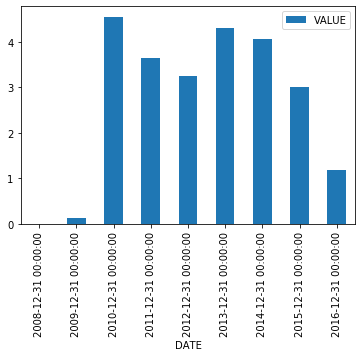

In [70]:
(yearly.pct_change() * 100).plot(kind='bar')

### .divide() , .add() , .multiply() ,....

 - Dividing Columns with Different Column Names

``` python
df1.divide(df2 , axis='rows' , fill_value=0)  #fill_values if shapes don't match

#CHAINING
df1.add(df2.col, axis='rows',fill_value=0).add(df3.col , fill_value=0)
```

In [84]:
df1 = pd.DataFrame({'A':[1,2,3,5,6] , 'B':[4,5,6,9,9]})
df2 = pd.DataFrame({'AA':[1,2,3] })

In [85]:
df1

,A,B
0,1,4
1,2,5
2,3,6
3,5,9
4,6,9


In [86]:
df2

,AA
0,1
1,2
2,3


In [87]:
df1/df2.AA

,A,B,0,1,2
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [102]:
df1.A.add(df2.AA, axis='rows' , fill_value=0)

0    2.0
1    4.0
2    6.0
3    5.0
4    6.0
dtype: float64

## DATAFRAME ITERATION

### .iloc vs .iterrows()   ................... [speed comparision]

- Iterating Over Rows

In [9]:
import pandas as pd
df = pd.read_csv('datasets/baseball_stats.csv')
df.head(1)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415


- 'RS' means runs scored and 'RA' means runs allowed.

``` python
df.iterrows()
>>> tuple  (index, pandas Series)
```

In [6]:
# Iterate over df and print each row
for i,row in df.iterrows():
    print(row)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

In [7]:
# Use one variable instead of two to store the result of .iterrows()
for row_tuple in df.iterrows():
    print(row_tuple)

(0, Team              ARI
League             NL
Year             2012
RS                734
RA                688
W                  81
OBP             0.328
SLG             0.418
BA              0.259
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 162
OOBP            0.317
OSLG            0.415
Name: 0, dtype: object)
(1, Team              ATL
League             NL
Year             2012
RS                700
RA                600
W                  94
OBP              0.32
SLG             0.389
BA              0.247
Playoffs            1
RankSeason          4
RankPlayoffs        5
G                 162
OOBP            0.306
OSLG            0.378
Name: 1, dtype: object)
(2, Team              BAL
League             AL
Year             2012
RS                712
RA                705
W                  93
OBP             0.311
SLG             0.417
BA              0.247
Playoffs            1
RankSeason          5
RankPlayoffs        4
G               

Name: 186, dtype: object)
(187, Team              CLE
League             AL
Year             2006
RS                870
RA                782
W                  78
OBP             0.349
SLG             0.457
BA               0.28
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 162
OOBP            0.335
OSLG            0.431
Name: 187, dtype: object)
(188, Team              COL
League             NL
Year             2006
RS                813
RA                812
W                  76
OBP             0.341
SLG             0.433
BA               0.27
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 162
OOBP            0.346
OSLG            0.438
Name: 188, dtype: object)
(189, Team              DET
League             AL
Year             2006
RS                822
RA                675
W                  95
OBP             0.329
SLG             0.449
BA              0.274
Playoffs            1
RankSeason          3
Ra

Name: 299, dtype: object)
(300, Team              ANA
League             AL
Year             2002
RS                851
RA                644
W                  99
OBP             0.341
SLG             0.433
BA              0.282
Playoffs            1
RankSeason          3
RankPlayoffs        1
G                 162
OOBP            0.314
OSLG            0.392
Name: 300, dtype: object)
(301, Team              ARI
League             NL
Year             2002
RS                819
RA                674
W                  98
OBP             0.346
SLG             0.423
BA              0.267
Playoffs            1
RankSeason          4
RankPlayoffs        4
G                 162
OOBP            0.305
OSLG            0.397
Name: 301, dtype: object)
(302, Team              ATL
League             NL
Year             2002
RS                708
RA                565
W                 101
OBP             0.331
SLG             0.409
BA               0.26
Playoffs            1
RankSeason          2
Ra

Name: 469, dtype: object)
(470, Team              PHI
League             NL
Year             1997
RS                668
RA                840
W                  68
OBP             0.322
SLG             0.385
BA              0.255
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 162
OOBP              NaN
OSLG              NaN
Name: 470, dtype: object)
(471, Team              PIT
League             NL
Year             1997
RS                725
RA                760
W                  79
OBP             0.329
SLG             0.404
BA              0.262
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 162
OOBP              NaN
OSLG              NaN
Name: 471, dtype: object)
(472, Team              SDP
League             NL
Year             1997
RS                795
RA                891
W                  76
OBP             0.342
SLG             0.407
BA              0.271
Playoffs            0
RankSeason        NaN
Ra

Name: 632, dtype: object)
(633, Team              SEA
League             AL
Year             1989
RS                694
RA                728
W                  73
OBP              0.32
SLG             0.384
BA              0.257
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 162
OOBP              NaN
OSLG              NaN
Name: 633, dtype: object)
(634, Team              SFG
League             NL
Year             1989
RS                699
RA                600
W                  92
OBP             0.316
SLG              0.39
BA               0.25
Playoffs            1
RankSeason          3
RankPlayoffs        2
G                 162
OOBP              NaN
OSLG              NaN
Name: 634, dtype: object)
(635, Team              STL
League             NL
Year             1989
RS                632
RA                608
W                  86
OBP             0.321
SLG             0.363
BA              0.258
Playoffs            0
RankSeason        NaN
Ra

Name: 775, dtype: object)
(776, Team              DET
League             AL
Year             1983
RS                789
RA                679
W                  92
OBP             0.335
SLG             0.427
BA              0.274
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 162
OOBP              NaN
OSLG              NaN
Name: 776, dtype: object)
(777, Team              HOU
League             NL
Year             1983
RS                643
RA                646
W                  85
OBP              0.32
SLG             0.375
BA              0.257
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 162
OOBP              NaN
OSLG              NaN
Name: 777, dtype: object)
(778, Team              KCR
League             AL
Year             1983
RS                696
RA                767
W                  79
OBP              0.32
SLG             0.397
BA              0.271
Playoffs            0
RankSeason        NaN
Ra

Name: 904, dtype: object)
(905, Team              CLE
League             AL
Year             1977
RS                676
RA                739
W                  71
OBP             0.334
SLG              0.38
BA              0.269
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 161
OOBP              NaN
OSLG              NaN
Name: 905, dtype: object)
(906, Team              DET
League             AL
Year             1977
RS                714
RA                751
W                  74
OBP             0.318
SLG              0.41
BA              0.264
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 162
OOBP              NaN
OSLG              NaN
Name: 906, dtype: object)
(907, Team              HOU
League             NL
Year             1977
RS                680
RA                650
W                  81
OBP              0.32
SLG             0.385
BA              0.254
Playoffs            0
RankSeason        NaN
Ra

Name: 968, dtype: object)
(969, Team              SFG
League             NL
Year             1975
RS                659
RA                671
W                  80
OBP             0.333
SLG             0.365
BA              0.259
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 161
OOBP              NaN
OSLG              NaN
Name: 969, dtype: object)
(970, Team              STL
League             NL
Year             1975
RS                662
RA                689
W                  82
OBP             0.327
SLG             0.375
BA              0.273
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 163
OOBP              NaN
OSLG              NaN
Name: 970, dtype: object)
(971, Team              TEX
League             AL
Year             1975
RS                714
RA                733
W                  79
OBP              0.33
SLG             0.371
BA              0.256
Playoffs            0
RankSeason        NaN
Ra

Name: 1060, dtype: object)
(1061, Team              OAK
League             AL
Year             1970
RS                678
RA                593
W                  89
OBP             0.325
SLG             0.392
BA              0.249
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 162
OOBP              NaN
OSLG              NaN
Name: 1061, dtype: object)
(1062, Team              PHI
League             NL
Year             1970
RS                594
RA                730
W                  73
OBP             0.305
SLG             0.356
BA              0.238
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 161
OOBP              NaN
OSLG              NaN
Name: 1062, dtype: object)
(1063, Team              PIT
League             NL
Year             1970
RS                729
RA                664
W                  89
OBP             0.325
SLG             0.406
BA               0.27
Playoffs            1
RankSeason        

Name: 1196, dtype: object)
(1197, Team              CLE
League             AL
Year             1963
RS                635
RA                702
W                  79
OBP             0.301
SLG             0.381
BA              0.239
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 162
OOBP              NaN
OSLG              NaN
Name: 1197, dtype: object)
(1198, Team              DET
League             AL
Year             1963
RS                700
RA                703
W                  79
OBP             0.327
SLG             0.382
BA              0.252
Playoffs            0
RankSeason        NaN
RankPlayoffs      NaN
G                 162
OOBP              NaN
OSLG              NaN
Name: 1198, dtype: object)
(1199, Team              HOU
League             NL
Year             1963
RS                464
RA                640
W                  66
OBP             0.283
SLG             0.301
BA               0.22
Playoffs            0
RankSeason        

In [8]:
def calc_run_diff(runs_scored, runs_allowed):

    run_diff = runs_scored - runs_allowed

    return run_diff

In [10]:
# Create an empty list to store run differentials
run_diffs =[]

In [13]:
%%timeit
# Create an empty list to store run differentials
run_diffs = []

# Write a for loop and collect runs allowed and runs scored for each row
for i,row in df.iterrows():
    runs_scored = row['RS']
    runs_allowed = row['RA']
    
    # Use the provided function to calculate run_diff for each row
    run_diff = calc_run_diff(runs_scored, runs_allowed)
    
    # Append each run differential to the output list
    run_diffs.append(run_diff)

138 ms ± 7.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%%timeit
# Create an empty list to store run differentials
run_diffs = []

# Write a for loop and collect runs allowed and runs scored for each row
for i in range(len(df)):
    row = df.iloc[i]
    runs_scored = row['RS']
    runs_allowed = row['RA']
    
    # Use the provided function to calculate run_diff for each row
    run_diff = calc_run_diff(runs_scored, runs_allowed)
    
    # Append each run differential to the output list
    run_diffs.append(run_diff)

217 ms ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### .itertuples()

- More Efficient than .iterrows()

- OUTPUT = Named Tuple

In [20]:
for row_namedtuple in df.itertuples():
    print(row_namedtuple)  #rteurn Named Tuple
    print(row_namedtuple.Team) ##ACCESING ATTRIBYTES  row_namedtuple.COLUMN_NAME

Pandas(Index=0, Team='ARI', League='NL', Year=2012, RS=734, RA=688, W=81, OBP=0.32799999999999996, SLG=0.418, BA=0.259, Playoffs=0, RankSeason=nan, RankPlayoffs=nan, G=162, OOBP=0.317, OSLG=0.415)
ARI
Pandas(Index=1, Team='ATL', League='NL', Year=2012, RS=700, RA=600, W=94, OBP=0.32, SLG=0.389, BA=0.247, Playoffs=1, RankSeason=4.0, RankPlayoffs=5.0, G=162, OOBP=0.306, OSLG=0.37799999999999995)
ATL
Pandas(Index=2, Team='BAL', League='AL', Year=2012, RS=712, RA=705, W=93, OBP=0.311, SLG=0.41700000000000004, BA=0.247, Playoffs=1, RankSeason=5.0, RankPlayoffs=4.0, G=162, OOBP=0.315, OSLG=0.40299999999999997)
BAL
Pandas(Index=3, Team='BOS', League='AL', Year=2012, RS=734, RA=806, W=69, OBP=0.315, SLG=0.415, BA=0.26, Playoffs=0, RankSeason=nan, RankPlayoffs=nan, G=162, OOBP=0.331, OSLG=0.428)
BOS
Pandas(Index=4, Team='CHC', League='NL', Year=2012, RS=613, RA=759, W=61, OBP=0.302, SLG=0.37799999999999995, BA=0.24, Playoffs=0, RankSeason=nan, RankPlayoffs=nan, G=162, OOBP=0.335, OSLG=0.424)
CH

CHW
Pandas(Index=1002, Team='CIN', League='NL', Year=1973, RS=741, RA=621, W=99, OBP=0.332, SLG=0.38299999999999995, BA=0.254, Playoffs=1, RankSeason=1.0, RankPlayoffs=3.0, G=162, OOBP=nan, OSLG=nan)
CIN
Pandas(Index=1003, Team='CLE', League='AL', Year=1973, RS=680, RA=826, W=71, OBP=0.315, SLG=0.387, BA=0.256, Playoffs=0, RankSeason=nan, RankPlayoffs=nan, G=162, OOBP=nan, OSLG=nan)
CLE
Pandas(Index=1004, Team='DET', League='AL', Year=1973, RS=642, RA=674, W=85, OBP=0.32, SLG=0.39, BA=0.254, Playoffs=0, RankSeason=nan, RankPlayoffs=nan, G=162, OOBP=nan, OSLG=nan)
DET
Pandas(Index=1005, Team='HOU', League='NL', Year=1973, RS=681, RA=672, W=82, OBP=0.312, SLG=0.376, BA=0.251, Playoffs=0, RankSeason=nan, RankPlayoffs=nan, G=162, OOBP=nan, OSLG=nan)
HOU
Pandas(Index=1006, Team='KCR', League='AL', Year=1973, RS=755, RA=752, W=88, OBP=0.33899999999999997, SLG=0.381, BA=0.261, Playoffs=0, RankSeason=nan, RankPlayoffs=nan, G=162, OOBP=nan, OSLG=nan)
KCR
Pandas(Index=1007, Team='LAD', League='N

In [ ]:
def calc_run_diff(runs_scored, runs_allowed):

    run_diff = runs_scored - runs_allowed

    return run_diff

In [22]:
%%timeit
run_diffs = []
# Loop over the DataFrame and calculate each row's run differential
for row in df.itertuples():
    runs_scored = row.RS
    runs_allowed = row.RA
    run_diff = calc_run_diff(runs_scored, runs_allowed)
    run_diffs.append(run_diff)

5.42 ms ± 543 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
%%timeit
# Create an empty list to store run differentials
run_diffs = []
# Write a for loop and collect runs allowed and runs scored for each row
for i,row in df.iterrows():
    runs_scored = row['RS']
    runs_allowed = row['RA']
    run_diff = calc_run_diff(runs_scored, runs_allowed)
    run_diffs.append(run_diff)

161 ms ± 23.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Looping Alternative  .apply() 

<div class="alert alert-block alert-danger">
<b>Axis:</b> 
<ul>
    <li>0 = Columns</li>
    <li>1 = Rows</li>
</ul>
</div>

``` pythton
df.apply(function , axis = 0/1 )
```

In [27]:
df = df[['RA' , 'W' , 'OBP']]
df.head(1)

,RA,W,OBP
0,688,81,0.328


In [28]:
# Gather sum of all columns
df.apply(sum, axis=0)

RA     880981.00
W       99674.00
OBP       402.04
dtype: float64

In [29]:
# Gather sum of all columns
df.apply(sum, axis=1)

0       769.328
1       694.320
2       798.311
3       875.315
4       820.302
         ...   
1227    840.330
1228    719.321
1229    793.341
1230    748.335
1231    776.308
Length: 1232, dtype: float64

In [31]:
def calc_run_diff(runs_scored, runs_allowed):

    run_diff = runs_scored - runs_allowed

    return run_diff

In [32]:
df.apply(lambda row: calc_run_diff(row['RA'] , row['W']), axis=1)

0       607.0
1       506.0
2       612.0
3       737.0
4       698.0
        ...  
1227    678.0
1228    533.0
1229    587.0
1230    580.0
1231    656.0
Length: 1232, dtype: float64

### Converting to Numpy and Performing Operations (FASTEST!!!)

- Convert to Numpy array and perform calculations

In [ ]:
df['col1'].values - df['col2'].values

## Missing Values

```python
df.isna()
df.isna().any()
df.isna().sum()

df.dropna()
df.dropna(thresh=1000, axis='columns')  # drop columns from the full dataset that have less than 1000 non-missing values
df.dropna(how='any')     #Drop if any row entry is NaN
df.dropna(how='all')     #Drop if ALL row entries is NaN
df.fillna(0)   #Fill with 0

df.any()   # Return Boolean values for columns ## Return False if theres is any NON-ZERO entries
df.all()   # Return Boolean values for columns ## Return False if theres is 0/empty value

df.isnull().any()

df[ :, df.isnull().any() ]    #Return's columns with NaN value

df[ :, df.notnull().all() ]     #Return's columns with NO  NaN value
```

In [337]:
D = {'name':['ashwin', 'arun', 'prema','janakiraman'], 'age':[25,np.nan,55,0], 'sex':['M','M',0,'F']}
df = pd.DataFrame(D)
df

,name,age,sex
0,ashwin,25.0,M
1,arun,NaN,M
2,prema,55.0,0
3,janakiraman,0.0,F


In [351]:
df.dropna??

In [350]:
df.dropna(how='any')

,name,age,sex
0,ashwin,25.0,M
2,prema,55.0,0
3,janakiraman,0.0,F


In [349]:
df.dropna(how='all')

,name,age,sex
0,ashwin,25.0,M
1,arun,NaN,M
2,prema,55.0,0
3,janakiraman,0.0,F


## Sorting

```python
df.sort_values('col', ascending=False)

df.sort_values(['col1','col2'] ascending=[True, False])
#col1---->1st preference


### SORINTG BY INDEX VALUES  ###

df.sort_index()
df.sort_index(level=['index2'])
df.sort_index(level=['index1','index2'],   ascending=[True, False])
```

## Subsetting  (Conditions)

```python
df['col']                                        # Single Column
df[['col1','col2']]                              # Multiple COlumns


df[df['col'] > 50]                              # Setting Conditions
#df[Boolean List]
df[(df['col1'] > 50)   &  (df['col2'] ==2)]      #Multiple Condition  (AND)
df[(df['col1'] > 50)   |  (df['col2'] ==2)]      # (OR)

#### DATES ####
df[df['col'] > "2015-12-30"]

#### CATEGORICAL VARIABLE #####
condition = df['col'].isin(['A','B'])
df[condition]

```

## Aggregating Data

### Data

In [55]:
###DATA###
import pandas as pd
df = pd.read_pickle(r'datasets/sales')
df.head(3)

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
2,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106


### .agg()   Method    (Custom+Numpy Aggregate Functions on Columns)

<p style="border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>$$\text{Custom Aggregate Functions}$$</b> 
</p>

- The .agg() method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once

```python

df['col'].agg (  function  )                        #Apply aggregating FUnction to specific column

df[['col1', 'col2']].agg (  function  )             #Apply aggregating FUnction to Multiple Columns

df['col'].agg (  [function1, function2]  )         #Apply Multiple aggregating FUnction to Multiple Columns


# function ----> eg: np.median   /   custom functions that return a single number from a column
 
```

In [7]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

In [14]:
print ( df['temperature_c'].agg(iqr)  )
print("\n")
print ( df[['temperature_c','unemployment']].agg(iqr)  )

15.299999999999994


temperature_c    15.300
unemployment      1.672
dtype: float64


In [22]:
print ( df[['temperature_c','unemployment']].agg([np.mean, iqr])  )

      temperature_c  unemployment
mean      15.632304      7.946231
iqr       15.300000      1.672000


### Cumulative Statistics

```pythton
  .cumsum()
  .cummax()
  .cummin()
  .cumprod()
```

In [51]:
df = df.sort_values('date', ascending=True)                         #sort df by Date
df['cum_weekly_sales'] = df['weekly_sales'].cumsum()                #Get cumulative sum for each row
df.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,cum_weekly_sales
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106,24924.50
10287,2,A,48,2010-02-05,2357.00,False,4.550000,0.679451,8.324,27281.50
10286,2,A,46,2010-02-05,30328.88,False,4.550000,0.679451,8.324,57610.38
10285,2,A,45,2010-02-05,27.50,False,4.550000,0.679451,8.324,57637.88
10284,2,A,44,2010-02-05,8788.47,False,4.550000,0.679451,8.324,66426.35


In [53]:
df['cum_max_sales'] = df['weekly_sales'].cummax()
df[['weekly_sales','cum_max_sales']].head(10)

,weekly_sales,cum_max_sales
0,24924.50,24924.50
10287,2357.00,24924.50
10286,30328.88,30328.88
10285,27.50,30328.88
10284,8788.47,30328.88
10283,8438.99,30328.88
10282,1707.77,30328.88
10281,96799.15,96799.15
10280,113144.90,113144.90
10279,4961.19,113144.90


### Grouped Summary Statistics  (.groupby  /// pivot tables)

#### Data

In [277]:
###DATA###
import pandas as pd
df = pd.read_pickle(r'datasets/sales')
df.head(3)

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
2,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106


#### Manual Method

In [58]:
# Calc total weekly sales
sales_all = df["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = df[df["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = df[df["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = df[df["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.65137469 0.28763851 0.0609868 ]


#### .groupby() Method

```python

df.groupby("col").AGGREGATE-FUNCTION()                     #Aggregate whoel DataFrame   # eg: df.groupby("col").sum() 

df.groupby("col")['col2'].AGGREGATE-FUNCTION()             #Aggregate Specific COlumn

df.groupby("col")[['col2', 'col3']].AGGREGATE-FUNCTION()   #Aggregate tow specific columns seperatly

```
<b> Applying Multiple Aggregating Functions (.agg() Method ) </b>

```python
df.groupby("col").agg([np.min, np.max, np.mean, np.median])

df.groupby("col")['col2'].agg([np.min, np.max, np.mean, np.median])


df.groupby("col")[["col4", "col5"]].agg([np.min, np.max, np.mean, np.median])
```

In [175]:
# Group by type; calc total weekly sales
sales_by_type = df.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
sales_propn_by_type

type
A    0.651375
B    0.287639
C    0.060987
Name: weekly_sales, dtype: float64

In [176]:
sales_stats = df.groupby("type")["weekly_sales"].agg([np.min, np.max, np.mean, np.median])
sales_stats

,amin,amax,mean,median
type,,,,
A,-4988.94,474330.10,20099.568043,10105.17
B,-3924.00,693099.36,12335.331875,6269.02
C,-379.00,112152.35,9519.532538,1149.67


In [81]:
# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = df.groupby("type")[["unemployment", "fuel_price_usd_per_l"]].agg([np.min, np.max, np.mean, np.median])
unemp_fuel_stats

unemployment                          fuel_price_usd_per_l            \
             amin    amax      mean median                 amin      amax   
type                                                                        
A           3.879  14.313  7.791595  7.818             0.653034  1.180321   
B           4.125  14.313  7.889666  7.806             0.664129  1.180321   
C           5.217  14.313  8.934350  8.300             0.664129  1.180321   

                          
          mean    median  
type                      
A     0.883391  0.902676  
B     0.892997  0.922225  
C     0.888848  0.902676

#### Pivot Tables

```python

df.pivot_table(values="col1", index="col2")                                #Default Aggregate Function - .sum()

df.pivot_table(values="col1", index="col2", aggfunc=[np.mean, np.median])  #Specifying Manual Aggregate Functions


df.pivot_table(values="col1", index="col2", columns="col3")

df.pivot_table(values="col1", index="col2", columns="col3", fill_value=0)    #Fill Missing Values with fill_value

df.pivot_table(values="col1", index="col2", columns="col3", fill_value=0, margins=True)   # Extra Info: Mean of All Values in Rows and Columns not including values filled with fill_value

```

$$\text{Pivoting on one variable} $$

In [85]:
# Pivot for mean weekly_sales for each store type
df.pivot_table(values="weekly_sales", index="type")

,weekly_sales
type,
A,20099.568043
B,12335.331875
C,9519.532538


In [86]:
df.pivot_table(values="weekly_sales", index="type", aggfunc=[np.mean, np.median])

,mean,median
,weekly_sales,weekly_sales
type,,
A,20099.568043,10105.17
B,12335.331875,6269.02
C,9519.532538,1149.67


In [87]:
df.pivot_table(values="weekly_sales", index="type", columns="is_holiday")

is_holiday,False,True
type,,
A,20008.746759,21297.517824
B,12248.741339,13478.844240
C,9518.528116,9532.963131


$$\text{Fill in missing values and sum values with pivot tables}$$

In [93]:
df.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0)

type,A,B,C
department,,,
1,22956.887886,17990.876158,8951.733462
2,51994.674873,43051.996919,14424.851713
3,13881.033137,12965.414311,820.276818
4,32973.814075,21259.895804,13669.370396
5,26803.448045,21184.602916,767.600774
...,...,...,...
95,97094.026043,40580.306862,50641.564872
96,19900.943552,4752.674874,15766.025431
97,22093.807101,3543.243304,13419.542809


<center><b style="font-size:19px;color:green">Margins is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.  </b></center>

- Extra Info: <b> Mean </b> of All Values in Rows and Columns not including values filled with fill_value

In [285]:
df.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True)

type,A,B,C,All
department,,,,
1,22956.887886,17990.876158,8951.733462,19213.485088
2,51994.674873,43051.996919,14424.851713,43607.020113
3,13881.033137,12965.414311,820.276818,11793.698516
4,32973.814075,21259.895804,13669.370396,25974.630238
5,26803.448045,21184.602916,767.600774,21365.583515
...,...,...,...,...
96,19900.943552,4752.674874,15766.025431,15217.211505
97,22093.807101,3543.243304,13419.542809,14437.120839
98,10979.816195,299.951644,5479.758054,6973.013875


In [279]:
pivot_table = df.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0)
pivot_table

type,A,B,C
department,,,
1,22956.887886,17990.876158,8951.733462
2,51994.674873,43051.996919,14424.851713
3,13881.033137,12965.414311,820.276818
4,32973.814075,21259.895804,13669.370396
5,26803.448045,21184.602916,767.600774
...,...,...,...
95,97094.026043,40580.306862,50641.564872
96,19900.943552,4752.674874,15766.025431
97,22093.807101,3543.243304,13419.542809


In [283]:
pivot_table.mean(axis='index')

type
A    17867.551290
B    10379.858708
C     5842.710999
dtype: float64

In [284]:
pivot_table.mean(axis='columns')

department
1     16633.165835
2     36490.507835
3      9222.241422
4     22634.360092
5     16251.883912
          ...     
95    62771.965925
96    13473.214619
97    13018.864405
98     5586.508631
99      155.163561
Length: 81, dtype: float64

In [360]:
# Add a year column to temperatures

df['year'] = df['date'].dt.year

df.head()

KeyError: 'date'

In [290]:
df.pivot_table(values="temperature_c", index=["store",'type'], columns="year")

,year,2010,2011,2012
store,type,,,
1,A,19.665715,19.753938,21.087875
2,A,19.709178,19.409547,21.232855
3,B,20.990985,21.836768,22.765560
4,A,15.526285,16.167638,18.865518
5,B,19.902674,20.498367,21.728371
6,A,20.023601,20.893760,21.916547
7,B,5.073881,0.558532,7.667189
8,A,16.286617,16.333170,18.321882
9,B,19.016819,19.501181,21.022699


## Dates

$$\text{Accessing Specific Values from Dates}$$

In [ ]:
df["date"].dt.month      # Access onlny months
df["date"].dt.year       #Access only years

## Categorical Columns ( Counting + Dropping Duplicates)

```python

###  DROPPING DUPLICATES  ###
df.drop_duplicates(subset=["col1"])                   #Drop Duplicate Values in col1           

df.drop_duplicates(subset=["col1", "col2"]).head()    #Drop Duplicate combinations of col1 &!!! col2


###  VALUE_ COUNTS  ####
df["col"].value_counts()                              #Count Unique Values
df["col"].value_counts(normalize=True)               #Count Unique Values & Normalize(%)
df["col"].value_counts(normalize=True, sort=True)    #Count Unique Values & Normalize(%) and Display sorted List
```

In [97]:
###DATA###
import pandas as pd
df = pd.read_pickle(r'datasets/sales')
df.head(3)

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
2,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106


In [101]:
df.drop_duplicates(subset=["store", "type"]).head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
10244,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
20482,3,B,1,2010-02-05,6453.58,False,7.616667,0.679451,7.368
29518,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
39790,5,B,1,2010-02-05,9323.89,False,4.277778,0.679451,6.566


In [115]:
holiday_dates = df[df["is_holiday"]==True].drop_duplicates(subset="date")

# Print date col of holiday_dates
print(holiday_dates["date"])

73     2010-02-12
2218   2010-09-10
3014   2010-11-26
3372   2010-12-31
3800   2011-02-11
5940   2011-09-09
6731   2011-11-25
7096   2011-12-30
7527   2012-02-10
9667   2012-09-07
Name: date, dtype: datetime64[ns]


In [118]:
df["type"].value_counts()

A    215478
B    155044
C     42597
Name: type, dtype: int64

In [119]:
df["type"].value_counts(normalize=True)

A    0.521588
B    0.375301
C    0.103111
Name: type, dtype: float64

In [121]:
df["department"].value_counts(sort=True)

1     6435
2     6435
3     6435
4     6435
7     6435
      ... 
78     227
65     143
77     142
39      16
43      12
Name: department, Length: 81, dtype: int64

In [130]:
departments = df[['store', 'department']]
departments.head()
# Get the proportion of departments of each number and sort
dept_props_sorted = departments["department"].value_counts(sort=True, normalize=True)
dept_props_sorted

1     0.015577
2     0.015577
3     0.015577
4     0.015577
7     0.015577
        ...   
78    0.000549
65    0.000346
77    0.000344
39    0.000039
43    0.000029
Name: department, Length: 81, dtype: float64